In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
names = [ 'feat_{}'.format(i) for i in range(73) ]

In [5]:
df = pd.read_csv('datasets/eighthr.data', names=names)

In [6]:
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 1/1/1998 to 12/31/2004
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   2534 non-null   object 
 1   feat_1   2534 non-null   object 
 2   feat_2   2534 non-null   object 
 3   feat_3   2534 non-null   object 
 4   feat_4   2534 non-null   object 
 5   feat_5   2534 non-null   object 
 6   feat_6   2534 non-null   object 
 7   feat_7   2534 non-null   object 
 8   feat_8   2534 non-null   object 
 9   feat_9   2534 non-null   object 
 10  feat_10  2534 non-null   object 
 11  feat_11  2534 non-null   object 
 12  feat_12  2534 non-null   object 
 13  feat_13  2534 non-null   object 
 14  feat_14  2534 non-null   object 
 15  feat_15  2534 non-null   object 
 16  feat_16  2534 non-null   object 
 17  feat_17  2534 non-null   object 
 18  feat_18  2534 non-null   object 
 19  feat_19  2534 non-null   object 
 20  feat_20  2534 non-null   object 
 21  feat_2

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

In [9]:
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
12/28/2004,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0
12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 1/1/1998 to 12/31/2004
Data columns (total 73 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   2235 non-null   float64
 1   feat_1   2242 non-null   float64
 2   feat_2   2240 non-null   float64
 3   feat_3   2242 non-null   float64
 4   feat_4   2241 non-null   float64
 5   feat_5   2242 non-null   float64
 6   feat_6   2243 non-null   float64
 7   feat_7   2245 non-null   float64
 8   feat_8   2244 non-null   float64
 9   feat_9   2247 non-null   float64
 10  feat_10  2246 non-null   float64
 11  feat_11  2242 non-null   float64
 12  feat_12  2247 non-null   float64
 13  feat_13  2246 non-null   float64
 14  feat_14  2246 non-null   float64
 15  feat_15  2248 non-null   float64
 16  feat_16  2250 non-null   float64
 17  feat_17  2251 non-null   float64
 18  feat_18  2248 non-null   float64
 19  feat_19  2242 non-null   float64
 20  feat_20  2240 non-null   float64
 21  feat_2

In [11]:
df.dropna(inplace=True)  # df = df.dropna()

In [12]:
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00,0.0
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00,0.0
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00,0.0
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08,0.0
1/7/1998,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,...,0.84,6.86,25.60,5695.0,26.75,48.45,10040.0,-80.0,0.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00,0.0
12/28/2004,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00,0.0
12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00,0.0
12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05,0.0


In [13]:
df.describe()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72
count,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,...,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000
mean,1.629020,1.570384,1.536979,1.520087,1.515268,1.533676,1.632431,2.037899,2.525772,2.843151,...,0.300087,9.821191,0.647201,5822.425555,10.680401,37.689334,10165.476448,-0.836492,0.358787,0.069302
std,1.253261,1.243717,1.218822,1.194880,1.187541,1.158722,1.137623,1.154328,1.172360,1.208258,...,0.244579,9.342806,7.352023,75.711087,20.170554,11.007448,52.056467,34.134815,1.262573,0.254035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.010000,-14.920000,-25.990000,5480.000000,-56.700000,-10.100000,9995.000000,-135.000000,0.000000,0.000000
25%,0.600000,0.600000,0.600000,0.600000,0.600000,0.700000,0.800000,1.200000,1.700000,2.000000,...,0.090000,2.705000,-3.990000,5775.000000,-2.750000,33.050000,10130.000000,-20.000000,0.000000,0.000000
50%,1.300000,1.300000,1.200000,1.300000,1.300000,1.300000,1.400000,1.900000,2.400000,2.800000,...,0.220000,9.220000,0.260000,5835.000000,14.700000,41.350000,10160.000000,0.000000,0.000000,0.000000
75%,2.400000,2.300000,2.200000,2.200000,2.200000,2.100000,2.200000,2.800000,3.300000,3.600000,...,0.470000,16.505000,4.645000,5880.000000,27.825000,45.150000,10195.000000,15.000000,0.050000,0.000000
max,6.900000,6.900000,7.100000,6.700000,7.200000,7.400000,7.200000,7.500000,9.200000,8.300000,...,1.000000,41.360000,30.420000,5965.000000,42.050000,59.150000,10350.000000,140.000000,20.650000,1.000000


In [14]:
Y = df['feat_72']

In [15]:
Y

1/1/1998      0.0
1/2/1998      0.0
1/3/1998      0.0
1/4/1998      0.0
1/7/1998      0.0
             ... 
12/27/2004    0.0
12/28/2004    0.0
12/29/2004    0.0
12/30/2004    0.0
12/31/2004    0.0
Name: feat_72, Length: 1847, dtype: float64

In [16]:
Y = np_utils.to_categorical(Y)

In [17]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
df.drop(['feat_72'], axis=1, inplace=True)

In [19]:
df.shape

(1847, 72)

In [20]:
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71
1/1/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.5,0.15,10.67,-1.56,5795.0,-12.10,17.90,10330.0,-55.0,0.00
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.5,0.48,8.39,3.84,5805.0,14.05,29.00,10275.0,-55.0,0.00
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.9,0.60,6.94,9.80,5790.0,17.90,41.30,10235.0,-40.0,0.00
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.8,0.49,8.73,10.54,5775.0,31.15,51.70,10195.0,-40.0,2.08
1/7/1998,3.7,3.2,3.8,5.1,6.0,7.0,6.3,6.4,6.3,5.4,...,-11.8,0.84,6.86,25.60,5695.0,26.75,48.45,10040.0,-80.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,-12.4,0.07,7.93,-4.41,5800.0,-25.60,21.80,10295.0,65.0,0.00
12/28/2004,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,-12.0,0.04,5.95,-1.14,5845.0,-19.40,19.10,10310.0,15.0,0.00
12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,-11.8,0.06,7.80,-0.64,5845.0,-9.60,35.20,10275.0,-35.0,0.00
12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,-10.8,0.25,7.72,-0.89,5845.0,-19.60,34.20,10245.0,-30.0,0.05


In [21]:
X_train = np.array(df[:-100].values.tolist(), dtype=np.float64)

In [22]:
X_test = np.array(df[-100:].values.tolist(), dtype=np.float64)

In [23]:
y_train = Y[:-100]

In [24]:
y_test = Y[-100:]

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1747, 72), (1747, 2), (100, 72), (100, 2))

In [26]:
X_train = X_train[47:]

In [27]:
y_train = y_train[47:]

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1700, 72), (1700, 2), (100, 72), (100, 2))

In [29]:
X_train = X_train.reshape(-1, 10, 72)

In [30]:
y_train = y_train.reshape(-1, 10, 2)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((170, 10, 72), (170, 10, 2), (100, 72), (100, 2))

In [32]:
model = Sequential()
model.add(LSTM(128, input_shape=(10, 72), return_sequences=True))
model.add(LSTM(256, return_sequences=True))  # Many to Many
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 128)           102912    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 256)           394240    
_________________________________________________________________
dense_1 (Dense)              (None, 10, 2)             514       
Total params: 497,666
Trainable params: 497,666
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.1)

Train on 153 samples, validate on 17 samples
Epoch 1/10
153/153 [==============================] - 7s 45ms/step - loss: 0.3019 - acc: 0.9196 - val_loss: 0.1860 - val_acc: 0.9824
Epoch 2/10
153/153 [==============================] - 5s 31ms/step - loss: 0.2857 - acc: 0.9196 - val_loss: 0.1479 - val_acc: 0.9824
Epoch 3/10
153/153 [==============================] - 5s 32ms/step - loss: 0.2876 - acc: 0.9196 - val_loss: 0.1319 - val_acc: 0.9824
Epoch 4/10
153/153 [==============================] - 5s 30ms/step - loss: 0.2868 - acc: 0.9196 - val_loss: 0.1003 - val_acc: 0.9824
Epoch 5/10
153/153 [==============================] - 4s 29ms/step - loss: 0.2840 - acc: 0.9196 - val_loss: 0.1057 - val_acc: 0.9824
Epoch 6/10
153/153 [==============================] - 4s 29ms/step - loss: 0.2827 - acc: 0.9196 - val_loss: 0.1043 - val_acc: 0.9824
Epoch 7/10
153/153 [==============================] - 4s 28ms/step - loss: 0.2847 - acc: 0.9196 - val_loss: 0.1195 - val_acc: 0.9824
Epoch 8/10
153/153 [====

In [35]:
X_test = X_test.reshape(-1, 10, 72)

In [36]:
y_test = y_test.reshape(-1, 10, 2)

In [37]:
score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step


In [38]:
score
# [0.10968674719333649, 0.9800000190734863], [loss, accuracy], 98.0% 정확도

[0.1621367484331131, 0.9800000190734863]

In [39]:
# LSTM, 삼성전자 주가 예측

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [41]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [42]:
df_raw = pd.read_csv('datasets/01-삼성전자-주가.csv', encoding='utf8')

In [43]:
df_raw

,일자,시가,고가,저가,종가,거래량
0,20200107,55700,56400,55600,55800,9893846
1,20200106,54900,55600,54600,55500,10278951
2,20200103,56000,56600,54900,55500,15422255
3,20200102,55500,56000,55000,55200,12993228
4,20191230,56200,56600,55700,55800,8356767
...,...,...,...,...,...,...
9283,19850109,126,126,122,123,324836
9284,19850108,129,129,127,127,845098
9285,19850107,129,130,128,129,771895
9286,19850105,129,129,128,128,108496


In [44]:
df_raw.describe()

,일자,시가,고가,저가,종가,거래량
count,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,9.288000e+03
mean,2.001347e+07,11108.556417,11228.754522,10986.106481,11108.235465,1.645823e+07
std,1.015376e+05,13792.646300,13920.105135,13658.809496,13790.922497,1.701535e+07
min,1.985010e+07,116.000000,116.000000,115.000000,116.000000,0.000000e+00
25%,1.992121e+07,624.000000,632.000000,620.000000,623.000000,3.833986e+06
50%,2.001032e+07,5045.000000,5190.000000,4955.000000,5075.000000,1.199608e+07
75%,2.010080e+07,15920.000000,16050.000000,15740.000000,15920.000000,2.284080e+07
max,2.020011e+07,57500.000000,57520.000000,56760.000000,57220.000000,3.266220e+08


In [45]:
df_raw['일자'] = pd.to_datetime(df_raw['일자'], format='%Y%m%d')

In [46]:
df_raw['연도'] = df_raw['일자'].dt.year

In [47]:
df_raw['월'] = df_raw['일자'].dt.month

In [48]:
df_raw['일'] = df_raw['일자'].dt.day

In [49]:
df_raw

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2020-01-07,55700,56400,55600,55800,9893846,2020,1,7
1,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6
2,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
3,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
4,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30
...,...,...,...,...,...,...,...,...,...
9283,1985-01-09,126,126,122,123,324836,1985,1,9
9284,1985-01-08,129,129,127,127,845098,1985,1,8
9285,1985-01-07,129,130,128,129,771895,1985,1,7
9286,1985-01-05,129,129,128,128,108496,1985,1,5


In [50]:
### 1990년 이후 데이터만 쓰자

In [51]:
df1 = df_raw.loc[ df_raw['연도'] >= 1990 ]

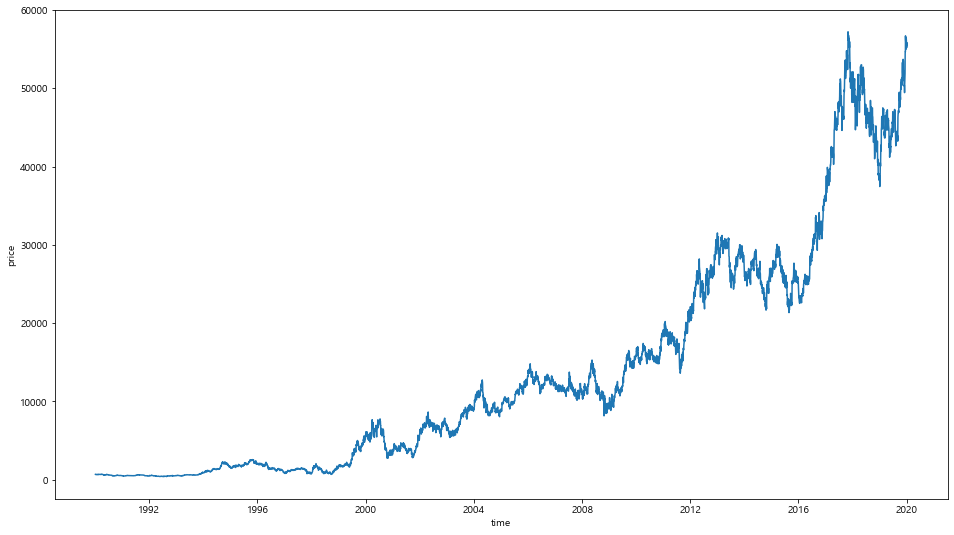

In [52]:
plt.figure(figsize=(16,9))
sns.lineplot( x=df1['일자'], y=df1['종가'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [53]:
# 정렬

In [54]:
df = df1.sort_index(ascending=False).reset_index(drop=True)

In [55]:
df

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,1990-01-03,673,689,661,685,1715032,1990,1,3
1,1990-01-04,689,701,685,693,2738562,1990,1,4
2,1990-01-05,689,693,678,678,1790849,1990,1,5
3,1990-01-06,685,689,681,681,1724183,1990,1,6
4,1990-01-08,681,687,673,673,966666,1990,1,8
...,...,...,...,...,...,...,...,...,...
7823,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30
7824,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
7825,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
7826,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6


In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
scaled_arr = scaler.fit_transform(df[scale_cols])

In [59]:
df_scaled = pd.DataFrame(scaled_arr, columns=scale_cols)

In [60]:
df_scaled

,시가,고가,저가,종가,거래량
0,0.004955,0.005129,0.004860,0.005138,0.005251
1,0.005236,0.005339,0.005286,0.005279,0.008384
2,0.005236,0.005199,0.005162,0.005015,0.005483
3,0.005165,0.005129,0.005215,0.005068,0.005279
4,0.005095,0.005094,0.005073,0.004927,0.002960
...,...,...,...,...,...
7823,0.977237,0.983895,0.981197,0.975012,0.025585
7824,0.964980,0.973391,0.968779,0.964454,0.039781
7825,0.973735,0.983895,0.967005,0.969733,0.047217
7826,0.954474,0.966389,0.961684,0.969733,0.031470


In [61]:
TEST_SIZE = 200

In [62]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [63]:
# 20일(window_size=20) 데이터를 묶어서 처리하는 함수
def make_dateset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [64]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

In [65]:
train_feature, train_label = make_dateset(train[feature_cols], train[label_cols], 20)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size=0.2)

In [68]:
x_train.shape, x_valid.shape

((6086, 20, 4), (1522, 20, 4))

In [69]:
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols], 20)

In [70]:
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM

In [72]:
model = Sequential()

In [73]:
model.add(LSTM(16, activation='relu',
              input_shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(Dense(1))

In [74]:
model.compile(loss='mse', optimizer='adam')

In [75]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [76]:
check_point = ModelCheckpoint("lstm_samsung_cp.h5", verbose=1, save_best_only=True)

In [77]:
%%time
hist = model.fit(x_train, y_train, epochs=200, batch_size=16,
                validation_data=(x_valid, y_valid), callbacks=[early_stop, check_point])

Train on 6086 samples, validate on 1522 samples
Epoch 1/200
6086/6086 [==============================] - 6s 1ms/step - loss: 9.8029e-04 - val_loss: 1.3685e-04

Epoch 00001: val_loss improved from inf to 0.00014, saving model to lstm_samsung_cp.h5
Epoch 2/200
6086/6086 [==============================] - 5s 812us/step - loss: 1.0306e-04 - val_loss: 1.0553e-04

Epoch 00002: val_loss improved from 0.00014 to 0.00011, saving model to lstm_samsung_cp.h5
Epoch 3/200
6086/6086 [==============================] - 5s 808us/step - loss: 9.5277e-05 - val_loss: 9.0251e-05

Epoch 00003: val_loss improved from 0.00011 to 0.00009, saving model to lstm_samsung_cp.h5
Epoch 4/200
6086/6086 [==============================] - 5s 843us/step - loss: 8.3043e-05 - val_loss: 8.4681e-05

Epoch 00004: val_loss improved from 0.00009 to 0.00008, saving model to lstm_samsung_cp.h5
Epoch 5/200
6086/6086 [==============================] - 5s 788us/step - loss: 8.6459e-05 - val_loss: 8.2684e-05

Epoch 00005: val_loss im

In [78]:
pred = model.predict(test_feature)

In [79]:
pred

array([[0.8124833 ],
       [0.8156551 ],
       [0.81836116],
       [0.8068796 ],
       [0.79254794],
       [0.7859847 ],
       [0.7810626 ],
       [0.776389  ],
       [0.77067995],
       [0.7676096 ],
       [0.7821015 ],
       [0.79165053],
       [0.7936757 ],
       [0.79296494],
       [0.7807614 ],
       [0.771271  ],
       [0.75313234],
       [0.7429788 ],
       [0.7390069 ],
       [0.7291118 ],
       [0.73588854],
       [0.7285695 ],
       [0.72124547],
       [0.7221269 ],
       [0.73837316],
       [0.74753857],
       [0.75565827],
       [0.75179696],
       [0.74307996],
       [0.7356654 ],
       [0.72551906],
       [0.7300735 ],
       [0.7336668 ],
       [0.7428939 ],
       [0.7498778 ],
       [0.7590381 ],
       [0.76061636],
       [0.7674812 ],
       [0.7739079 ],
       [0.7740251 ],
       [0.76292706],
       [0.7574189 ],
       [0.7550052 ],
       [0.7590985 ],
       [0.77619207],
       [0.78183585],
       [0.7874595 ],
       [0.788

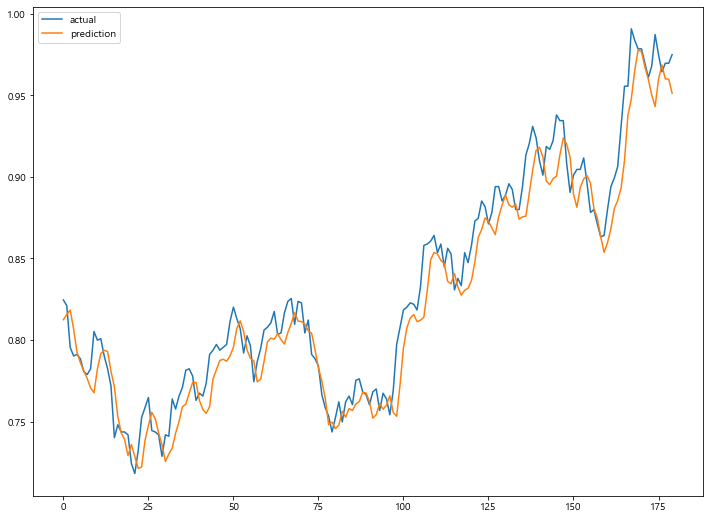

In [80]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [81]:
# end